In [1]:
import fm
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
def parse(x):
    x = x[:4] + ' '+ x[4:6] + ' '+x[6:]
    return datetime.strptime(x, '%Y %m %d')

A = pd.read_csv('train_data/' + 'city_A' + '/infection.csv',parse_dates = ['date'], date_parser=parse)
B = pd.read_csv('train_data/' + 'city_B' + '/infection.csv',parse_dates = ['date'], date_parser=parse)
C = pd.read_csv('train_data/' + 'city_C' + '/infection.csv',parse_dates = ['date'], date_parser=parse)
D = pd.read_csv('train_data/' + 'city_D' + '/infection.csv',parse_dates = ['date'], date_parser=parse)
E = pd.read_csv('train_data/' + 'city_E' + '/infection.csv',parse_dates = ['date'], date_parser=parse)
f = pd.read_csv('train_data/submission.csv',header = None)

In [52]:
region = A[A["region"] == 0].copy()
region['cumsum'] = region['infections'].cumsum()
region["day"] = range(region.shape[0]) 

In [53]:
N = 200000
region['cumsum'] = region['cumsum']/N

In [54]:
region

,city,region,date,infections,cumsum,day
0,A,0,2120-05-01,0,0.000000,0
1,A,0,2120-05-02,0,0.000000,1
2,A,0,2120-05-03,0,0.000000,2
3,A,0,2120-05-04,0,0.000000,3
4,A,0,2120-05-05,0,0.000000,4
5,A,0,2120-05-06,0,0.000000,5
6,A,0,2120-05-07,0,0.000000,6
7,A,0,2120-05-08,0,0.000000,7
8,A,0,2120-05-09,0,0.000000,8
9,A,0,2120-05-10,0,0.000000,9


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

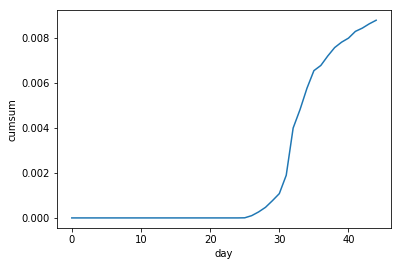

In [56]:
sns.lineplot(x="day", y="cumsum",data=region)
plt.show()

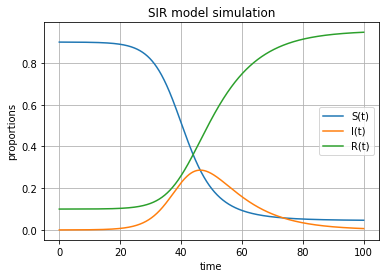

In [57]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt


# model
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return ([dS_dt, dI_dt, dR_dt])


# initialization

S0 = 0.9 # ratio
I0 = 0.0001 # ratio
R0 = 0.1 # ratio
beta = 0.35
gamma = 0.1

# time vector
t = np.linspace(0, 100, 10000)
# result
res = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
res = np.array(res)
# plot
plt.figure(figsize=[6, 4])
plt.plot(t, res[:, 0], label='S(t)')
plt.plot(t, res[:, 1], label='I(t)')
plt.plot(t, res[:, 2], label='R(t)')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('proportions')
plt.title('SIR model simulation')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


[74.47685705 55.41221095]


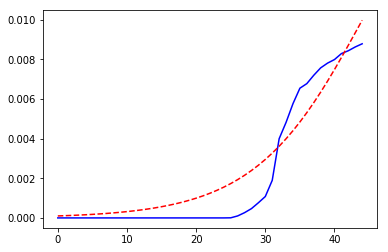

In [58]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
def func2(x,beta,gamma):
    t = np.linspace(0, 100, 10000)
    res = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
    return res[x,1]
xdata = region["day"].values
ydata = region["cumsum"].values
plt.plot(xdata,ydata,'b-')
popt, pcov = curve_fit(func2, xdata, ydata)
#popt数组中，三个值分别是待求参数a,b,c
y2 = [func2(i, popt[0],popt[1]) for i in xdata]
plt.plot(xdata,y2,'r--')
print(popt)